### Dataset Visualizations

Datasets used:
* [Wine quality dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [Speeddating dataset](https://www.openml.org/d/40536)

In [1]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data from file
speeddating = pd.read_csv("../data/speeddating/speeddating.csv") 
white_wine = pd.read_csv("../data/wine/winequality-white.csv", sep=';') 
red_wine = pd.read_csv("../data/wine/winequality-red.csv", sep=';') 
wine = pd.concat([red_wine,white_wine])

# showing first 5 rows of dataset
pd.set_option('display.max_columns', 500)
speeddating.shape

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8378, 123)

Showing missing values in Speeddating dataset

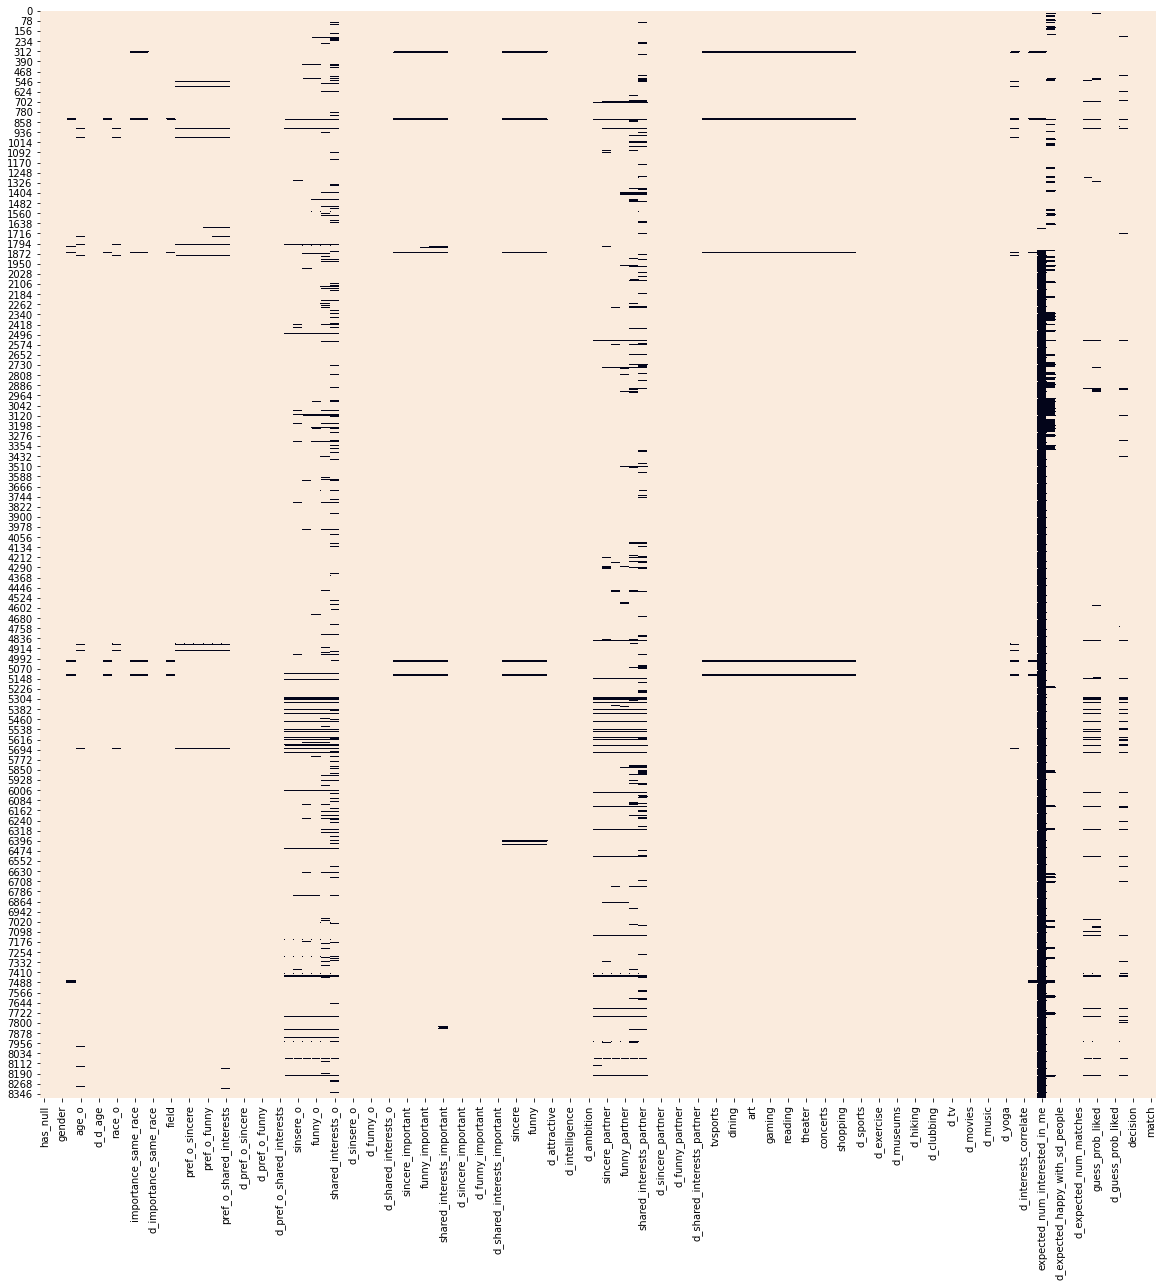

In [4]:
speeddating = speeddating.replace("?", np.nan)

# all rows with nan values, 7330 in total
null_speeddating = speeddating[speeddating.isnull().values.any(axis=1)]

# how many values missing per column, only if > 0
values_missing = speeddating.isna().sum()
values_missing[values_missing > 0]

# percentage for each column
percent_missing = speeddating.isnull().sum() * 100 / len(speeddating)
percent_missing[percent_missing > 0]

# how many values missing in total, 18372
speeddating.isnull().sum().sum()

# visualize as heatmap, missing values are white
fig, ax = plt.subplots(figsize=(20,20)) 
cmap = sns.cm.rocket_r
sns.heatmap(speeddating.isnull(), cbar=False, ax=ax, cmap=cmap)
# plt.savefig('heatmap_missing_values.png')

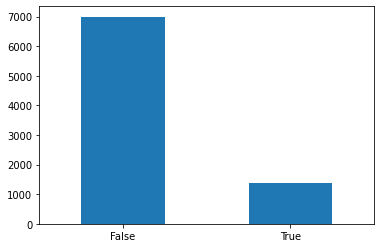

In [5]:
# distribution of target attribute "match"
speeddating['match'].astype('bool').value_counts().plot(kind='bar', rot=0)
# plt.savefig('distribution.png')

Showing that the wine quality dataset has no missing values.

In [6]:
wine.shape # tuple representing the dimensionality of the DataFrame

(6497, 12)

In [7]:
# all rows with nan values, 0 in total
null_wine = wine[wine.isnull().values.any(axis=1)]
null_wine.shape

(0, 12)

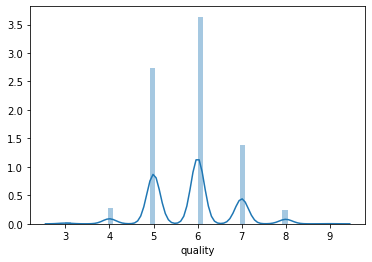

In [8]:
# distribution of target attribute "quality"
sns.distplot(wine.quality) # kde=0 if kernel density estimation is not necessary

In [ ]:
# Scatterplot-Matrix visualises correlation of every possible combination of attributes, 
# especially the correlation of the input attributes and the target attribute quality is of importance
# sns.pairplot(wine)

# heatmap visualises the correlation of each pair of values
sns.heatmap(wine.corr())